# Customer Churn Prediction for the Telecom Operator "NoBreaks.com"

**DESCRIPTION:**

The telecom operator "NoBreaks.com" wants to learn how to predict customer churn. If it turns out that a user plans to leave, they will be offered promo codes and special conditions. The operator's team has collected personal data on some customers, as well as information about their tariffs and contracts.

# Exploratory Analysis:

## Initial Analysis of All Data

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
from phik import phik_matrix
import numpy as np
from phik.report import plot_correlation_matrix
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

In [4]:
try: 
    contact_data = pd.read_csv('/datasets/contract_new.csv')
    personal_data = pd.read_csv('/datasets/personal_new.csv')
    internet_data = pd.read_csv('/datasets/internet_new.csv')
    phone_data = pd.read_csv('/datasets/phone_new.csv')
except:
    contact_data = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
    personal_data = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    internet_data = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    phone_data = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

In [5]:
contact_data.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [6]:
contact_data.describe(include='all')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,67,3,2,4,NaN,6658
top,2604-IJPDU,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5942,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [7]:
contact_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [8]:
# Changing Data Type for the TotalCharges Column
contact_data['TotalCharges'] = pd.to_numeric(contact_data['TotalCharges'], errors='coerce')
contact_data[contact_data['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


We note that TotalCharges are missing for users who started their contracts at the end dates after which the table was not updated. Therefore, the missing values can be filled with 0, as the customer has not yet had the opportunity to spend money on services. 

In [9]:
contact_data['TotalCharges'] = contact_data['TotalCharges'].fillna(0)

**CONCLUSION:**

All columns behave appropriately, except for TotalCharges. In the TotalCharges column, there were several clients who signed up for services at the moment the table's accounting was discontinued, meaning they had not yet spent any money on services. This resulted in NaN values, which I ultimately filled with zeros.

In [10]:
personal_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [11]:
personal_data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,2604-IJPDU,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [12]:
# Changing 1 and 0 to Yes and No
def to_string (num):
    if num == 1:
        return 'Yes'
    elif num == 0:
        return 'No'
    
personal_data['SeniorCitizen'] = personal_data['SeniorCitizen'].apply(to_string)

**CONCLUSION:**

The data looks good. However, it is advisable to convert the values in the SeniorCitizen column to Yes and No for ease of use. I have made this correction.

In [13]:
internet_data.head(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [14]:
internet_data.describe(include='all')

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,1125-SNVCK,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


**CONCLUSION:**

Good data. No complaints. However, the dataset has fewer rows than previous ones.

In [15]:
phone_data.head(5)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [16]:
phone_data.describe(include='all')

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2604-IJPDU,No
freq,1,3390


**CONCLUSION**

The data is adequate. There are fewer rows than in the first two tables.

**OVERALL CONCLUSION:**

Overall, the initial analysis of the datasets showed that the data behaves adequately, except for a couple of columns. However, not all datasets have the same number of rows, indicating that we are inevitably going to lose some data irretrievably. Therefore, we will strive to retain as much of the remaining data as possible and select the most effective models.

## Creating the Target Variable and Features

In [17]:
# The function will return No if the customer has not yet churned, Yes if the customer has churned.
def create_target (pre_target):
    if pre_target == 'No':
        return 'No'
    else:
        return 'Yes'

In [18]:
contact_data['Target'] = contact_data['EndDate'].apply(create_target)

**CONCLUSION:**

The target was formed based on the EndDate column.

In [19]:
pre_merge_df_1 = pd.merge(contact_data, personal_data, on='customerID')
pre_merge_df_2 = pd.merge(internet_data, phone_data, on='customerID', how='left')
merge_df = pd.merge(pre_merge_df_1, pre_merge_df_2, on='customerID', how='left')

In [20]:
merge_df['EndDate'] = merge_df['EndDate'].replace({'No': '2020-02-01'})
merge_df['EndDate'] = pd.to_datetime(merge_df['EndDate'])
merge_df['BeginDate'] = pd.to_datetime(merge_df['BeginDate'])
merge_df['SynteticDays'] = (merge_df['EndDate'] - merge_df['BeginDate']).dt.days
merge_df['SynteticDays']

0         31
1       1036
2        123
3       1371
4        153
        ... 
7038     730
7039    2191
7040     337
7041     215
7042    2010
Name: SynteticDays, Length: 7043, dtype: int64

In [21]:
merge_df = merge_df.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

In [22]:
merge_df.head(5)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,SynteticDays
0,Month-to-month,Yes,Electronic check,29.85,31.04,No,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,NaN,31
1,One year,No,Mailed check,56.95,2071.84,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No,1036
2,Month-to-month,Yes,Mailed check,53.85,226.17,No,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No,123
3,One year,No,Bank transfer (automatic),42.30,1960.60,No,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,1371
4,Month-to-month,Yes,Electronic check,70.70,353.50,No,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No,153


In [23]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   Target            7043 non-null   object 
 6   gender            7043 non-null   object 
 7   SeniorCitizen     7043 non-null   object 
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  InternetService   5517 non-null   object 
 11  OnlineSecurity    5517 non-null   object 
 12  OnlineBackup      5517 non-null   object 
 13  DeviceProtection  5517 non-null   object 
 14  TechSupport       5517 non-null   object 
 15  StreamingTV       5517 non-null   object 
 16  StreamingMovies   5517 non-null   object 


In [24]:
merge_df.describe(include='all')

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,SynteticDays
count,7043,7043,7043,7043.000000,7043.000000,7043,7043,7043,7043,7043,5517,5517,5517,5517,5517,5517,5517,4835,7043.000000
unique,3,2,4,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN
top,Month-to-month,Yes,Electronic check,NaN,NaN,No,Male,No,No,No,Fiber optic,No,No,No,No,No,No,Yes,NaN
freq,3875,4171,2365,NaN,NaN,5942,3555,5901,3641,4933,3096,3498,3088,3095,3473,2810,2785,2629,NaN
mean,NaN,NaN,NaN,64.761692,2115.312885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898.555729
std,NaN,NaN,NaN,30.090047,2112.742814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,683.130510
min,NaN,NaN,NaN,18.250000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,35.500000,436.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.000000
50%,NaN,NaN,NaN,70.350000,1343.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,761.000000
75%,NaN,NaN,NaN,89.850000,3236.690000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1461.000000


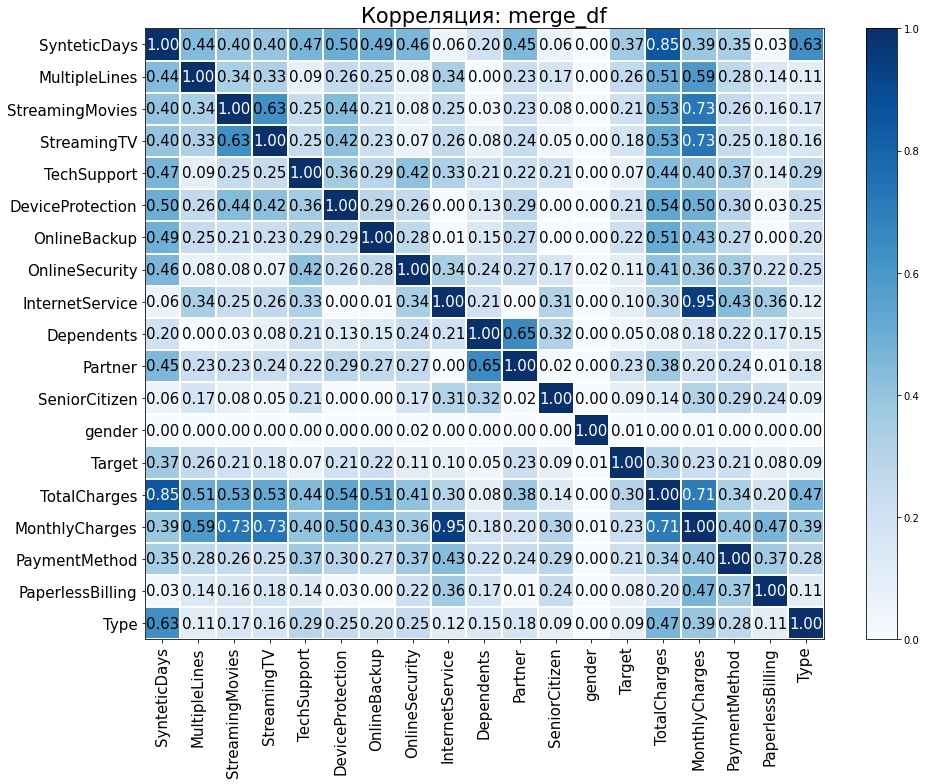

In [25]:
phik_overview =\
merge_df.phik_matrix(interval_cols=['TotalCharges', 'MonthlyCharges', 'SynteticDays'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'Корреляция: merge_df', fontsize_factor=1.5,
                        figsize=(14,11))
plt.tight_layout()

In [26]:
train_cols = ['MonthlyCharges', 'TotalCharges', 'Partner', 'OnlineBackup', 'DeviceProtection', 
              'StreamingMovies', 'MultipleLines', 'StreamingTV', 'PaymentMethod', 'Target',
              'Type', 'PaperlessBilling', 'SeniorCitizen', 'InternetService', 'OnlineSecurity', 'TechSupport', 'SynteticDays']

**CONCLUSION:**

We will include features in the final selection with a correlation to the target of no less than 0.15. As a result, the training dataset will contain the following columns: MonthlyCharges, TotalCharges, Partner, OnlineBackup, DeviceProtection, StreamingMovies, MultipleLines, StreamingTV, and PaymentMethod.

In [27]:
train_df = merge_df[train_cols]

In [28]:
train_df.head(5)

,MonthlyCharges,TotalCharges,Partner,OnlineBackup,DeviceProtection,StreamingMovies,MultipleLines,StreamingTV,PaymentMethod,Target,Type,PaperlessBilling,SeniorCitizen,InternetService,OnlineSecurity,TechSupport,SynteticDays
0,29.85,31.04,Yes,Yes,No,No,NaN,No,Electronic check,No,Month-to-month,Yes,No,DSL,No,No,31
1,56.95,2071.84,No,No,Yes,No,No,No,Mailed check,No,One year,No,No,DSL,Yes,No,1036
2,53.85,226.17,No,Yes,No,No,No,No,Mailed check,No,Month-to-month,Yes,No,DSL,Yes,No,123
3,42.30,1960.60,No,No,Yes,No,NaN,No,Bank transfer (automatic),No,One year,No,No,DSL,Yes,Yes,1371
4,70.70,353.50,No,No,No,No,No,No,Electronic check,No,Month-to-month,Yes,No,Fiber optic,No,No,153


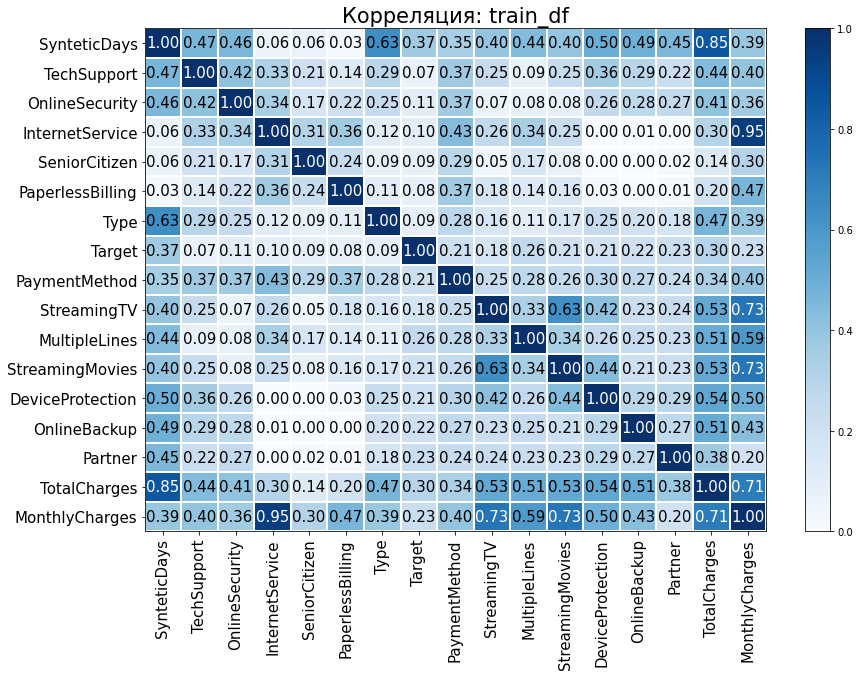

In [29]:
phik_overview =\
train_df.phik_matrix(interval_cols=['TotalCharges', 'MonthlyCharges', 'SynteticDays'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'Корреляция: train_df', fontsize_factor=1.5,
                        figsize=(13,9.5))
plt.tight_layout()

In [30]:
train_df = train_df.drop('TotalCharges', axis=1)
train_df = train_df.drop('InternetService', axis=1)
train_df = train_df.drop('StreamingTV', axis=1)

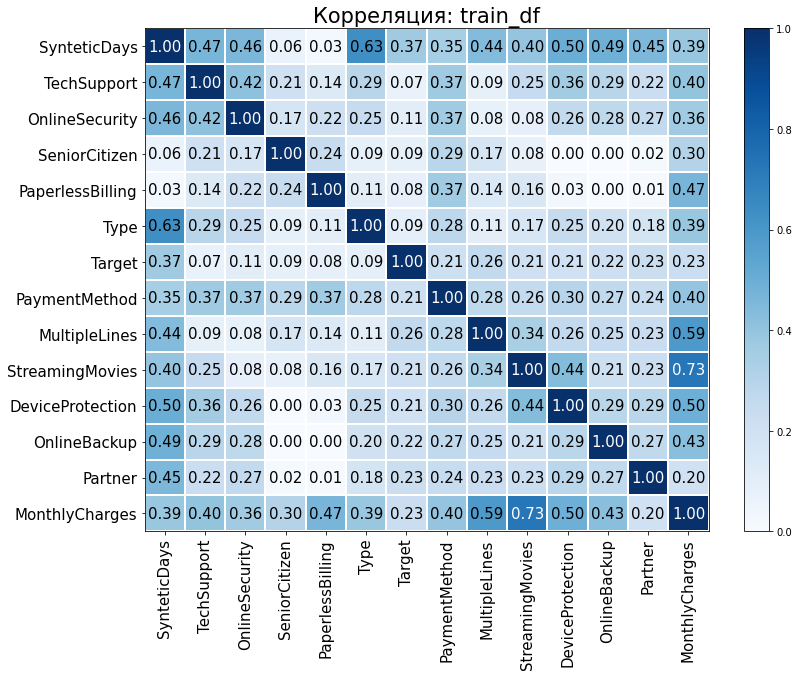

In [31]:
phik_overview =\
train_df.phik_matrix(interval_cols=['MonthlyCharges', 'SynteticDays'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'Корреляция: train_df', fontsize_factor=1.5,
                        figsize=(12,9.5))
plt.tight_layout()

**CONCLUSION**

1. The TotalCharges column was removed because it had a high correlation with SynteticDays.
2. The StreamingTV column was removed due to its strong correlation with StreamingMovies and lower correlation compared to it.
3. The InternetService column was removed as it had low correlation with the target variable and reduced the model's quality.

**OVERALL CONCLUSION**

The final selection included the following columns: 'MonthlyCharges', 'Partner', 'OnlineBackup', 'DeviceProtection', 'StreamingMovies', 'MultipleLines', 'PaymentMethod', 'Type', 'PaperlessBilling', 'SeniorCitizen', 'OnlineSecurity', 'TechSupport', 'SynteticMonth'. These columns were chosen based on theoretical correlation studies and empirical experiments. This feature set demonstrated the best performance.

In [32]:
train_df.columns

Index(['MonthlyCharges', 'Partner', 'OnlineBackup', 'DeviceProtection',
       'StreamingMovies', 'MultipleLines', 'PaymentMethod', 'Target', 'Type',
       'PaperlessBilling', 'SeniorCitizen', 'OnlineSecurity', 'TechSupport',
       'SynteticDays'],
      dtype='object')

## Investigation of the Target Variable and Features

In [33]:
# Creating Functions to Generate Pie Charts
def create_pie(column):
    target_counts = train_df[column].value_counts()
    plt.figure(figsize=(6, 6))
    sns.set_palette("deep")
    plt.pie(target_counts, labels=target_counts.index, autopct='%.1f%%', textprops={'fontsize': 15})
    plt.title(f"Балас классов (столбец: {column})", fontsize=18)
    plt.axis('equal')
    plt.show()
    
def create_2D_pie(column):
    target_counts_no = train_df[train_df['Target'] == 'No'][column].value_counts().sort_index()

    target_counts_yes = train_df[train_df['Target'] == 'Yes'][column].value_counts().sort_index()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
    sns.set_palette("deep")

    axes[0].pie(target_counts_no, labels=target_counts_no.index, autopct='%.1f%%', textprops={'fontsize': 12})
    axes[0].set_title(f'Балас классов (столбец: {column}), Target = No', fontsize=12)

    sns.set_palette("deep")
    axes[1].pie(target_counts_yes, labels=target_counts_yes.index, autopct='%.1f%%', textprops={'fontsize': 12})
    axes[1].set_title(f'Балас классов (столбец: {column}), Target = Yes', fontsize=12)

    plt.tight_layout()
    plt.show()
    
# Function to Obtain General Information Needed for Analyzing Categorical Features
def cat_info(column):
    print(column)
    print('Количество пропусков')
    print(train_df[column].isna().sum())
    print('Уникальные значения:')
    print(train_df[column].unique())

### Column: Target

In [34]:
cat_info('Target')

Target
Количество пропусков
0
Уникальные значения:
['No' 'Yes']


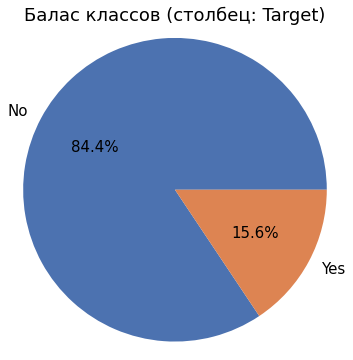

In [35]:
create_pie('Target')

**CONCLUSION**

A class imbalance has been detected. In the future, to address this issue, we will use model hyperparameters that balance the classes.

### Column: PaymentMethod

In [36]:
cat_info('PaymentMethod')

PaymentMethod
Количество пропусков
0
Уникальные значения:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


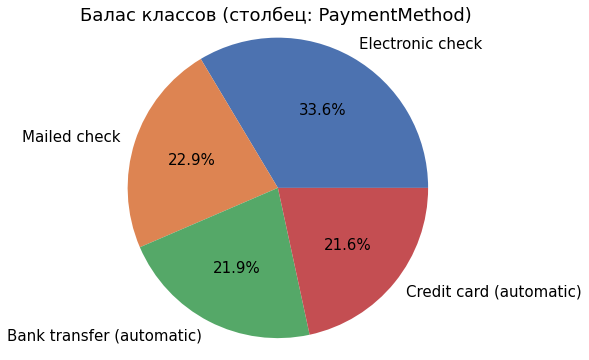

In [37]:
create_pie('PaymentMethod')

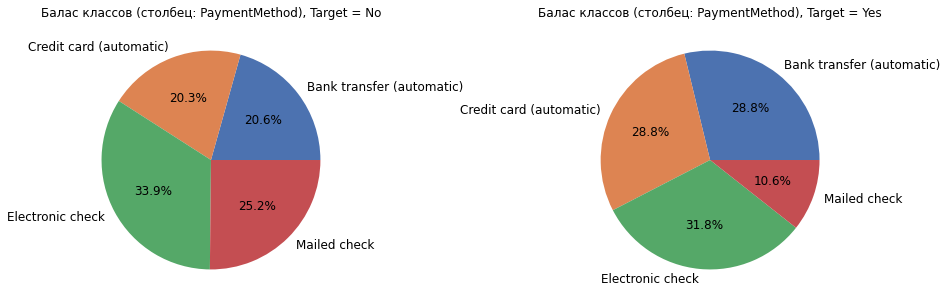

In [38]:
create_2D_pie('PaymentMethod')

**CONCLUSION**

1. There is no class imbalance.
2. Among the class distributions relative to the target variable, we observe a divergence. Classes: Credit card (automatic) and Bank transfer (automatic) are more prevalent when the target variable is Yes, while classes: Electronic check and Mailed check are more prevalent when the target variable is No. This indicates that the column was correctly chosen as a feature for training.

### Column: MultipleLines

In [39]:
cat_info('MultipleLines')

MultipleLines
Количество пропусков
2208
Уникальные значения:
[nan 'No' 'Yes']


We encountered missing values, and now we need to understand how to handle all the missing values in categorical features that resulted from merging datasets.

I will proceed with the following assumption: if there is no information about categories in the database, in the Yes/No format, then most likely the category is equal to No.

Let's check how the correlation changes if we fill the missing values with No.

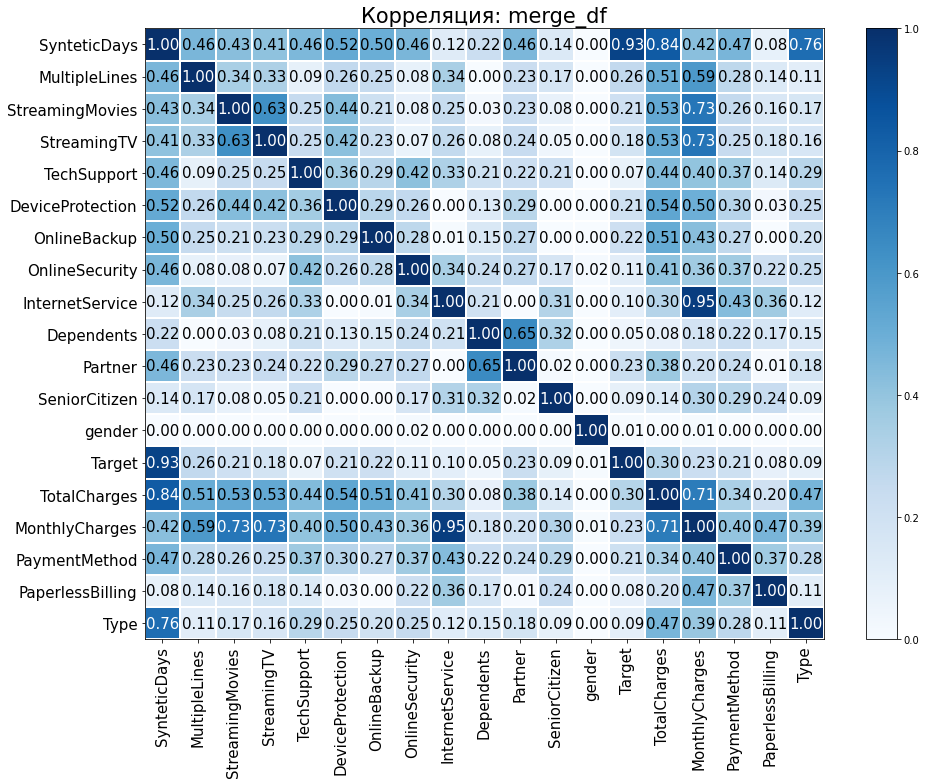

In [40]:
phik_overview =\
merge_df.phik_matrix(interval_cols=['TotalCharges', 'MonthlyCharges'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'Корреляция: merge_df', fontsize_factor=1.5,
                        figsize=(14,11))
plt.tight_layout()

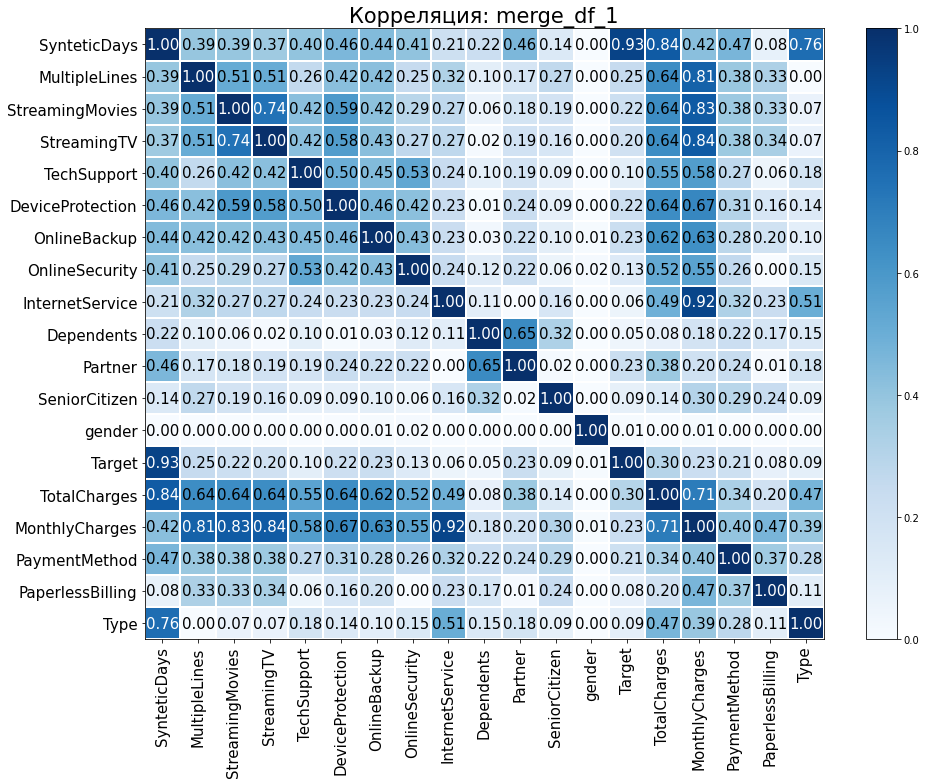

In [41]:
merge_df_1 = merge_df.fillna('No')
merge_df_1['TotalCharges'] = pd.to_numeric(merge_df_1['TotalCharges'], errors='coerce')

phik_overview =\
merge_df_1.phik_matrix(interval_cols=['TotalCharges', 'MonthlyCharges'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'Корреляция: merge_df_1', fontsize_factor=1.5,
                        figsize=(14,11))
plt.tight_layout()

The correlation between the target variable changed insignificantly, no more than 0.03 units. Therefore, our decision to fill the missing values with No can be considered an acceptable measure for preserving the features.

In [42]:
train_df['MultipleLines'] = train_df['MultipleLines'].fillna('No')
cat_info('MultipleLines')

MultipleLines
Количество пропусков
0
Уникальные значения:
['No' 'Yes']


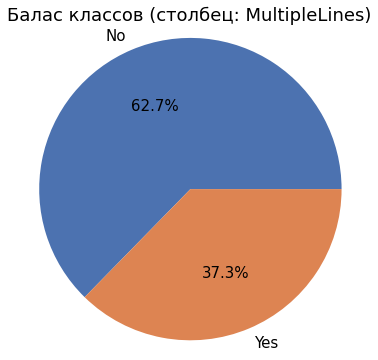

In [43]:
create_pie('MultipleLines')

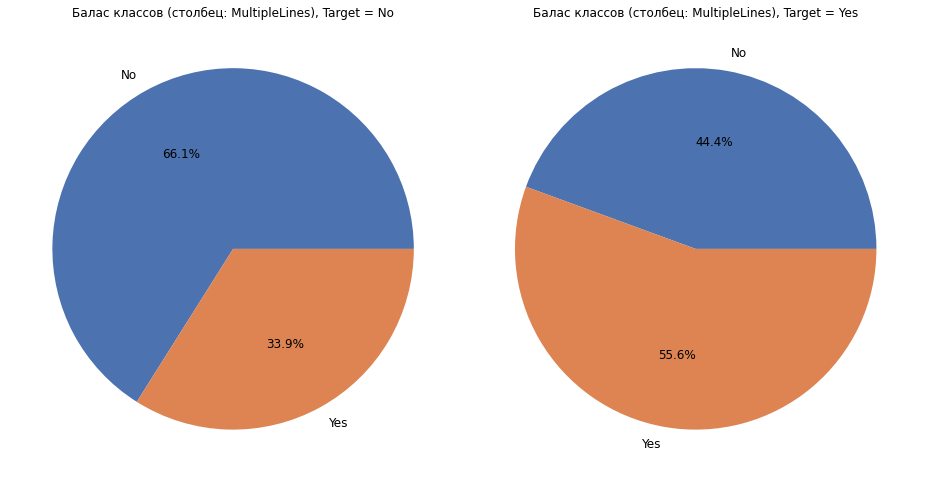

In [44]:
create_2D_pie('MultipleLines')

**CONCLUSION**

1. There is a class imbalance, but it is insignificant and does not significantly affect the model's quality.
2. Customers were more likely to stay if they did not use the option to connect their telephone to multiple lines simultaneously.

### Column: StreamingMovies

In [45]:
cat_info('StreamingMovies')

StreamingMovies
Количество пропусков
1526
Уникальные значения:
['No' 'Yes' nan]


In [46]:
train_df['StreamingMovies'] = train_df['StreamingMovies'].fillna('No')
cat_info('StreamingMovies')

StreamingMovies
Количество пропусков
0
Уникальные значения:
['No' 'Yes']


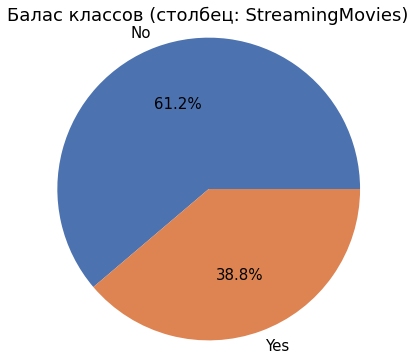

In [47]:
create_pie('StreamingMovies')

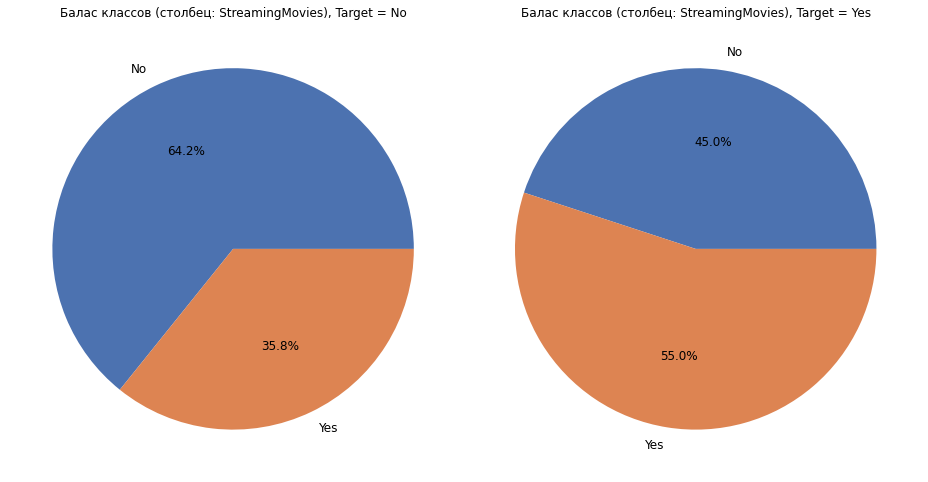

In [48]:
create_2D_pie('StreamingMovies')

**CONCLUSION**

1. There is a class imbalance, but it is insignificant and does not significantly affect the model's quality.
2. Customers were more likely to stay if they did not use the streaming movies service.

### Column: DeviceProtection

In [49]:
cat_info('DeviceProtection')

DeviceProtection
Количество пропусков
1526
Уникальные значения:
['No' 'Yes' nan]


In [50]:
train_df['DeviceProtection'] = train_df['DeviceProtection'].fillna('No')
cat_info('DeviceProtection')

DeviceProtection
Количество пропусков
0
Уникальные значения:
['No' 'Yes']


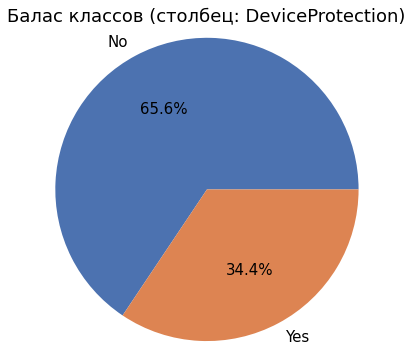

In [51]:
create_pie('DeviceProtection')

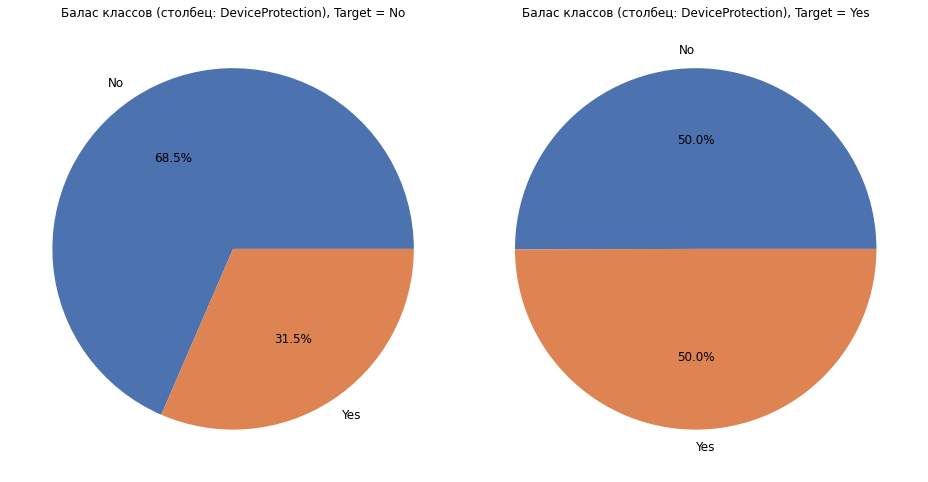

In [52]:
create_2D_pie('DeviceProtection')

**CONCLUSION:**

1. There is a class imbalance, but it is insignificant and does not significantly affect the model's quality.
2. Customers who stayed used device protection less frequently, while customers who left were evenly split in their use of the service.

### Column: OnlineBackup

In [53]:
cat_info('OnlineBackup')

OnlineBackup
Количество пропусков
1526
Уникальные значения:
['Yes' 'No' nan]


In [54]:
train_df['OnlineBackup'] = train_df['OnlineBackup'].fillna('No')
cat_info('OnlineBackup')

OnlineBackup
Количество пропусков
0
Уникальные значения:
['Yes' 'No']


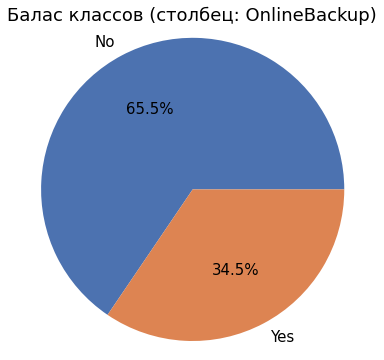

In [55]:
create_pie('OnlineBackup')

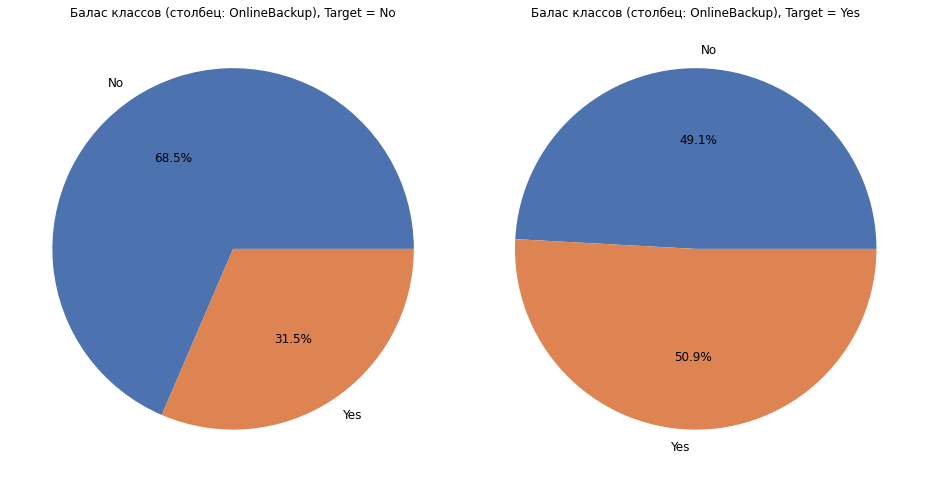

In [56]:
create_2D_pie('OnlineBackup')

**CONCLUSION:**

1. There is a class imbalance, but it is insignificant and does not significantly affect the model's quality.
2. Customers who stayed used online backup less frequently, while customers who left were almost evenly split in their use of the service.

### Column: Partner

In [57]:
cat_info('Partner')

Partner
Количество пропусков
0
Уникальные значения:
['Yes' 'No']


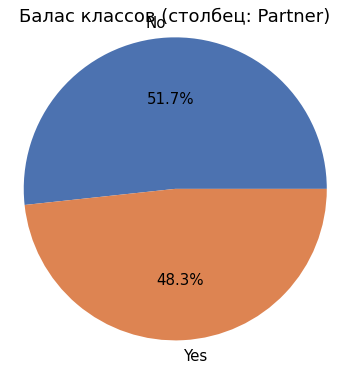

In [58]:
create_pie('Partner')

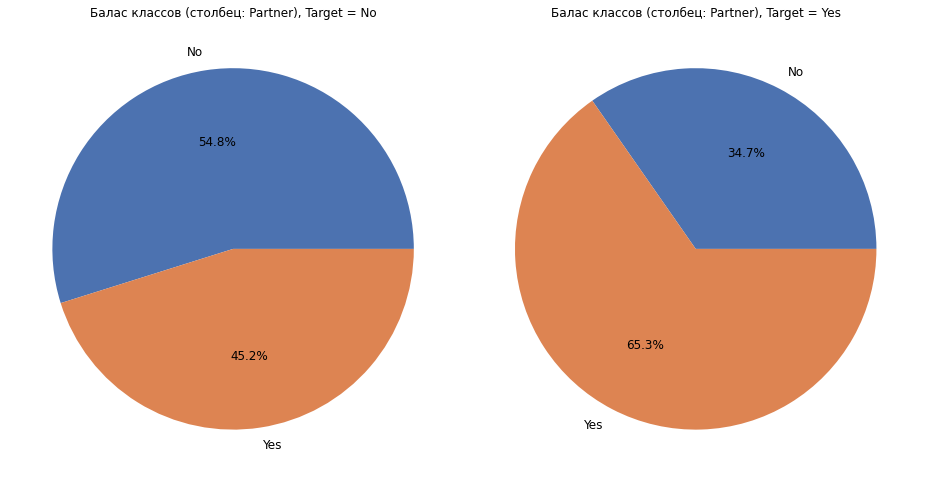

In [59]:
create_2D_pie('Partner')

**CONCLUSION:**

1. There is no class imbalance.
2. Customers who left more often had a partner, likely due to the lack of attractive family service packages.

### Column: TotalCharges

In [60]:
# General information
train_df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [61]:
# Searching for Missing Values
train_df['MonthlyCharges'].isna().sum()

0

No missing values.

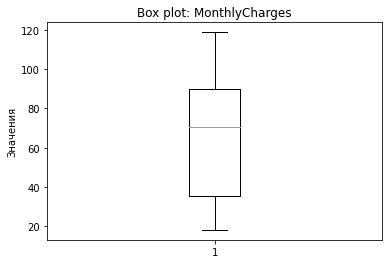

In [62]:
# Check Data for Outliers
plt.boxplot(train_df['MonthlyCharges'])
plt.title('Box plot: MonthlyCharges')
plt.ylabel('Значения')
plt.show()

**CONCLUSION**

1. There are no missing values.
2. There are no outliers.


### Column: SeniorCitizen

In [63]:
cat_info('SeniorCitizen')

SeniorCitizen
Количество пропусков
0
Уникальные значения:
['No' 'Yes']


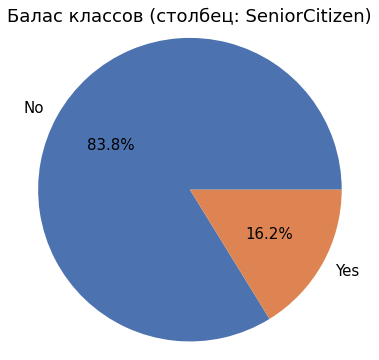

In [64]:
create_pie('SeniorCitizen')

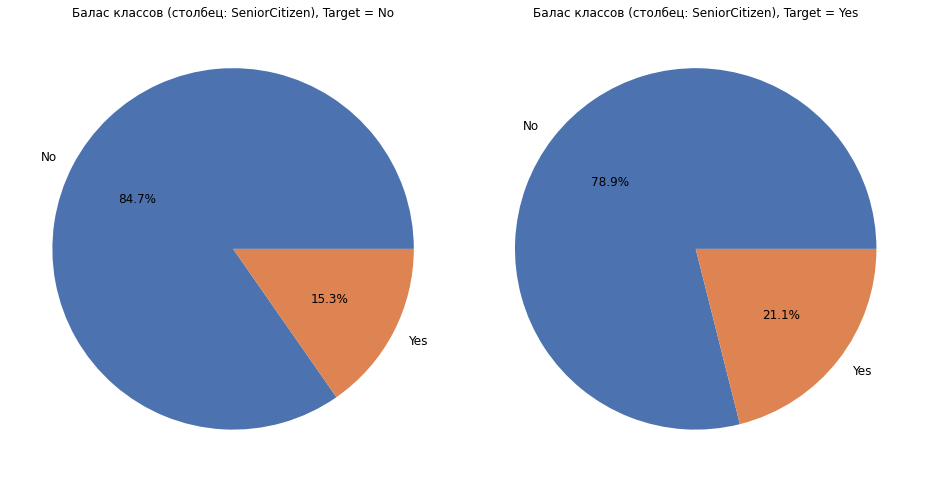

In [65]:
create_2D_pie('SeniorCitizen')

**CONCLUSION:**

1. There is a pronounced class imbalance.
2. Senior citizens are more likely to discontinue the company's services.

### Column: Type

In [66]:
cat_info('Type')

Type
Количество пропусков
0
Уникальные значения:
['Month-to-month' 'One year' 'Two year']


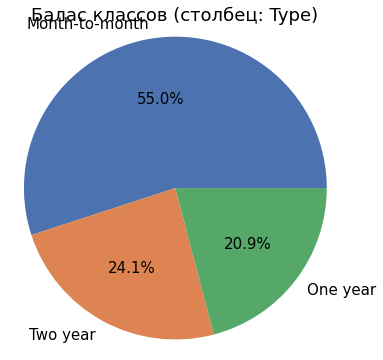

In [67]:
create_pie('Type')

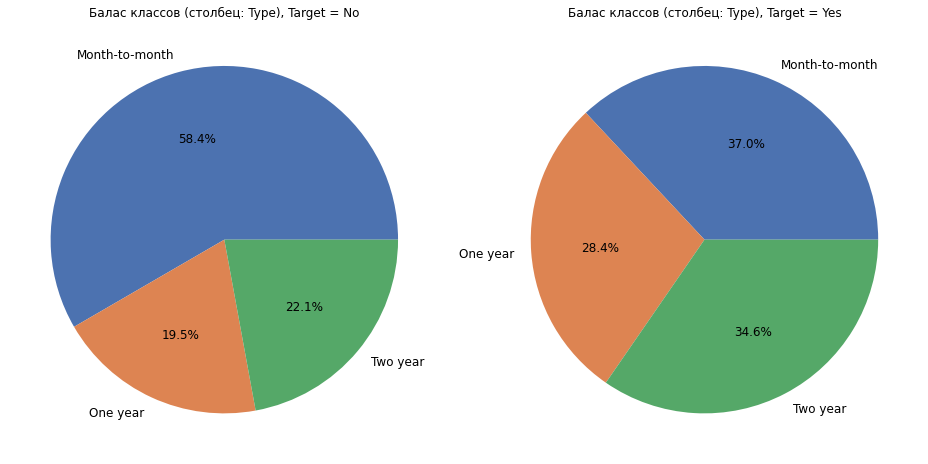

In [68]:
create_2D_pie('Type')

**CONCLUSION**

1. There are no missing values.
2. The class imbalance is insignificant.
3. Customers find it more convenient to pay for services monthly. Customers using other methods tended to leave more often.

### Column: PaperlessBilling

In [69]:
cat_info('PaperlessBilling')

PaperlessBilling
Количество пропусков
0
Уникальные значения:
['Yes' 'No']


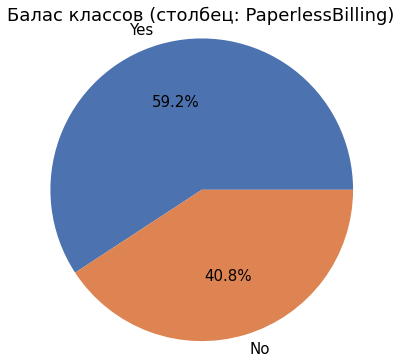

In [70]:
create_pie('PaperlessBilling')

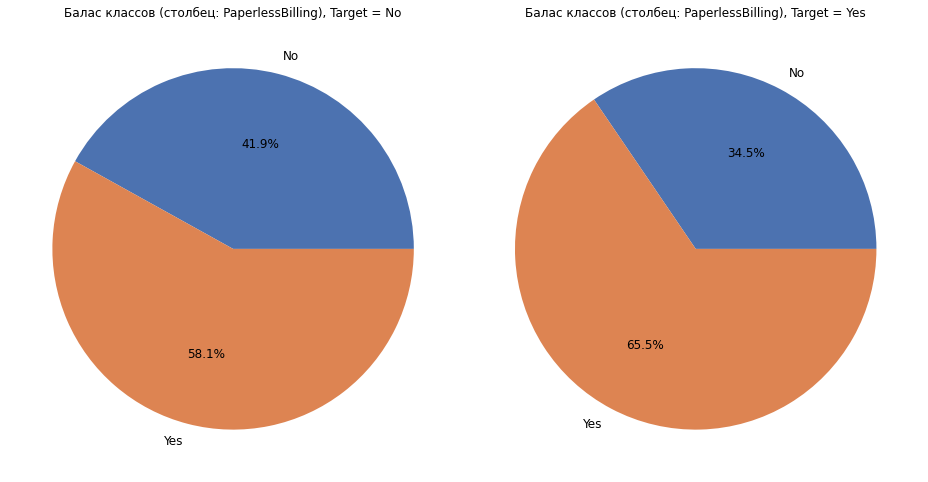

In [71]:
create_2D_pie('PaperlessBilling')

**CONCLUSION**

1. There are no missing values.
2. There is no class imbalance.
3. Customers who used paperless billing were more likely to leave.

### Column: OnlineSecurity

In [72]:
cat_info('OnlineSecurity')

OnlineSecurity
Количество пропусков
1526
Уникальные значения:
['No' 'Yes' nan]


In [73]:
train_df['OnlineSecurity'] = train_df['OnlineSecurity'].fillna('No')
cat_info('OnlineSecurity')

OnlineSecurity
Количество пропусков
0
Уникальные значения:
['No' 'Yes']


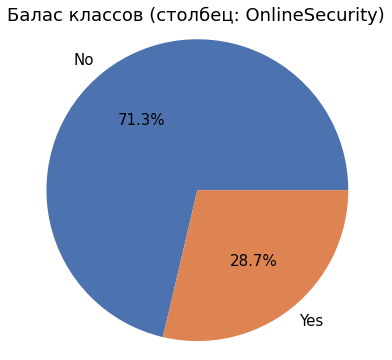

In [74]:
create_pie('OnlineSecurity')

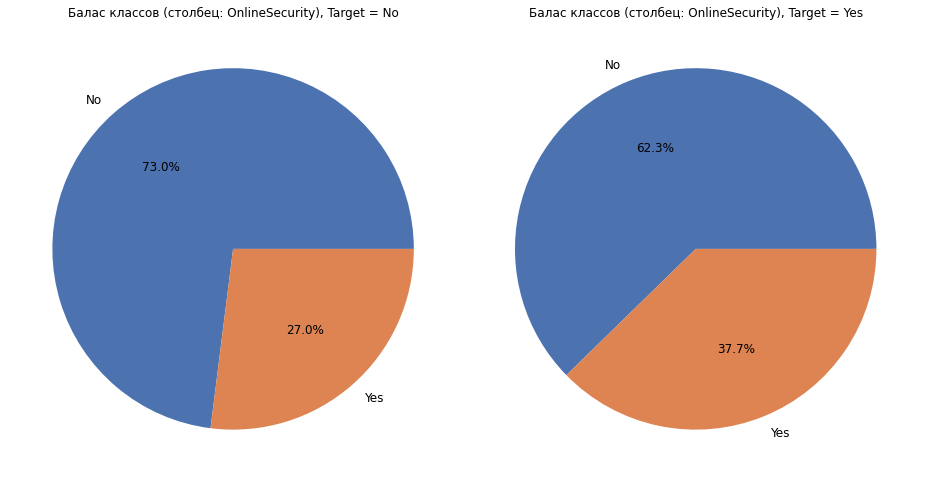

In [75]:
create_2D_pie('OnlineSecurity')

**CONCLUSION**

1. Missing values have been handled.
2. There is a class imbalance.
3. Users were more likely to leave if they used the online security service.

### Column: TechSupport

In [76]:
cat_info('TechSupport')

TechSupport
Количество пропусков
1526
Уникальные значения:
['No' 'Yes' nan]


In [77]:
train_df['TechSupport'] = train_df['TechSupport'].fillna('No')
cat_info('TechSupport')

TechSupport
Количество пропусков
0
Уникальные значения:
['No' 'Yes']


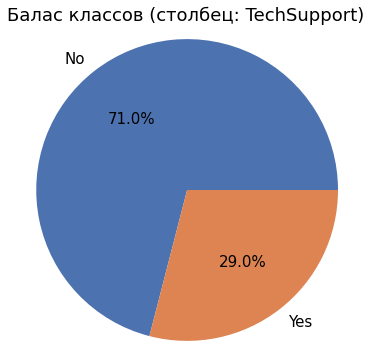

In [78]:
create_pie('TechSupport')

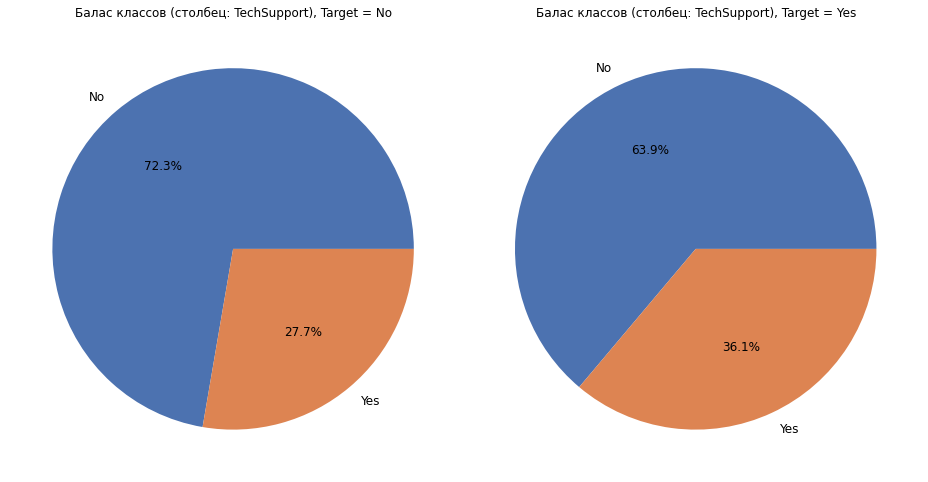

In [79]:
create_2D_pie('TechSupport')

**CONCLUSION**

1. Missing values have been handled.
2. There is a class imbalance.
3. It appears that customers are dissatisfied with the dedicated tech support line. Users were more likely to leave if they used this service.

### Столбец SynteticDays

In [80]:
train_df['SynteticDays'].describe()

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: SynteticDays, dtype: float64

In [81]:
train_df['SynteticDays'].isna().sum()

0

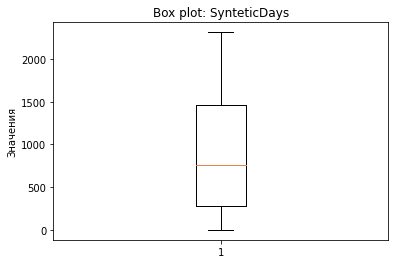

In [82]:
plt.boxplot(train_df['SynteticDays'])
plt.title('Box plot: SynteticDays')
plt.ylabel('Значения')
plt.show()

**CONCLUSION**

1. There are no missing values.
2. There are no outliers.

## Selection of the Best Models and Hyperparameters

**MODEL SELECTION:**

I will select one representative from basic machine learning algorithms. Using more complex algorithms like neural networks does not make sense due to the small amount of data and the high risk of overfitting.
I will select the following algorithms:
1. Linear model - Logistic Regression,
2. Tree-based model - Random Forest,
3. Gradient Boosting - CatBoost.

In [83]:
# Convert Target to Numeric Format
def rep_target(value):
    if value == 'Yes':
        return 1
    else:
        return 0

In [84]:
# Splitting into Features and Target
features_df = train_df.drop('Target', axis=1)
target_df = train_df['Target']
target_df = target_df.apply(rep_target)

In [85]:
# Splitting the Dataset into Training and Testing Sets
features_train, features_test, target_train, target_test =\
train_test_split(features_df, target_df, test_size=0.25, random_state=140823)

cols_to_transform = ['Partner', 'OnlineBackup', 'DeviceProtection',
       'StreamingMovies', 'MultipleLines', 'PaymentMethod',
       'PaperlessBilling', 'SeniorCitizen', 'OnlineSecurity', 'TechSupport', 'Type']
cols_to_keep = ['MonthlyCharges', 'SynteticDays']

print(features_train.shape, features_test.shape)
target_train.shape, target_test.shape

(5282, 13) (1761, 13)


((5282,), (1761,))

In [86]:
# Calculate balanced class weights for CatBoost
target_column = target_train.values
class_weights = compute_class_weight('balanced', np.unique(target_column), target_column)
class_weights

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 0 1 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([0.59348315, 3.17427885])

In [87]:
# Creating a Pipeline for Logistic Regression
transformer = make_column_transformer(
    (OneHotEncoder(), cols_to_transform),                  
    ('passthrough', cols_to_keep) 
)


pipeline = Pipeline([
    ('data_transform', transformer),  
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))  
])

param_grid = {
    'model__solver': ['lbfgs'], 
    'model__C': [0.1, 1.0, 10.0],    
    'model__penalty': ['l2']    
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(features_train, target_train)

print(grid_search.best_params_)
grid_search.best_score_

{'model__C': 1.0, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


0.746082501303066

**CONCLUSION:**

Poor result, moving on to the next algorithm.

In [88]:
# Creating a Pipeline for Random Forest
transformer = make_column_transformer(
    (OrdinalEncoder(), cols_to_transform),                  
    ('passthrough', cols_to_keep) 
)


pipeline = Pipeline([
    ('data_transform', transformer),  
    ('model', RandomForestClassifier(class_weight='balanced', random_state=140823))  
])

param_grid = {
    'model__n_estimators': range(10, 151, 10),
    'model__max_depth': range(1, 16),
    'model__min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(features_train, target_train)

print(grid_search.best_params_)
grid_search.best_score_

{'model__max_depth': 7, 'model__min_samples_split': 10, 'model__n_estimators': 70}


0.8246639994682357

**CONCLUSION**

Satisfactory result, but already much closer to the baseline. Moving on to the next algorithm.

In [89]:
# Creating a Pipeline for Gradient Boosting:
transformer = make_column_transformer(
    (OrdinalEncoder(), cols_to_transform),                  
    ('passthrough', cols_to_keep) 
)

pipeline = Pipeline([
    ('data_transform', transformer),  
    ('model', CatBoostClassifier(random_state=140823, class_weights=class_weights))  
])

param_grid = {
    'model__iterations': [500, 1000],
    'model__learning_rate' : [0.03],
    'model__depth' : [3, 6, 9],
    'model__verbose' : [False]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(features_train, target_train)

print(grid_search.best_params_)
grid_search.best_score_

{'model__depth': 6, 'model__iterations': 1000, 'model__learning_rate': 0.03, 'model__verbose': False}


0.8934356520477389

**CONCLUSION:**

Excellent result, the baseline has been successfully surpassed. Moving on to testing the algorithm on the test dataset.

## Testing the Best Model

In [90]:
transformer = make_column_transformer(
    (OrdinalEncoder(), cols_to_transform),                  
    ('passthrough', cols_to_keep) 
)

train_feat_oe = pd.DataFrame(transformer.fit_transform(features_train), columns= cols_to_transform + cols_to_keep)
test_feat_oe = pd.DataFrame(transformer.fit_transform(features_test), columns= cols_to_transform + cols_to_keep)
train_feat_oe

,Partner,OnlineBackup,DeviceProtection,StreamingMovies,MultipleLines,PaymentMethod,PaperlessBilling,SeniorCitizen,OnlineSecurity,TechSupport,Type,MonthlyCharges,SynteticDays
0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,45.60,153.0
1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,44.75,276.0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,58.95,1461.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,20.00,883.0
4,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,55.00,427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,99.55,791.0
5278,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,70.15,518.0
5279,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,105.90,2163.0
5280,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,93.85,518.0


Concatenated the feature names with their importance scores to make it easier to retrieve feature importance in subsequent steps.

In [97]:
model = CatBoostClassifier(depth=6,
                           iterations=1000, 
                           learning_rate=0.03, 
                           verbose=False, 
                           random_state=140823, 
                           class_weights=class_weights)

model.fit(train_feat_oe, target_train)
pred = model.predict_proba(test_feat_oe)[:, 1]
prediction = model.predict(test_feat_oe)
auc_roc = roc_auc_score(target_test, pred)
print(auc_roc)

0.9267219470384803


We exceeded the baseline by 0.7 units, which is a very good result. Let's move on to interpreting the ROC curve.

## Visualizing the Result and Conclusion

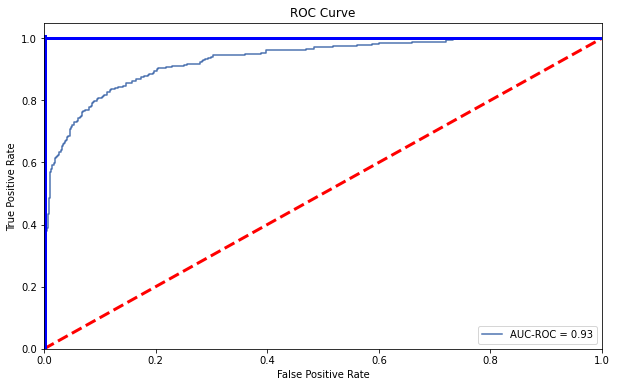

In [92]:
# Построение кривой
fpr, tpr, thresholds = roc_curve(target_test, pred)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', color='red', linewidth=3)
plt.plot([0, 0], [0, 1], color='blue', linewidth=6)
plt.plot([0, 1], [1, 1], color='blue', linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**CONCLUSION**

The red dashed line represents the worst model, with an AUC_ROC (i.e., area under the curve) of 0.5, while the blue line represents the ideal model with an AUC-ROC of 1. The light blue curve represents the result of our model (AUC-ROC = 0.93). The closer the light blue curve is to the blue line and the farther it is from the red line, the better our model.

In our graph, we see that our curve is very close to the ideal model, and the area under the curve is 0.93. An AUC-ROC > 0.9 is considered indicative of a very good model.

The graph shows that the task has been successfully accomplished.

HOWEVER, AUC-ROC does not account for class imbalance, so it is important to use an additional metric. We will use accuracy and analyze the confusion matrix.

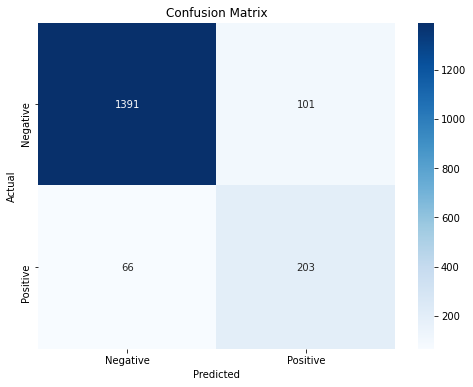

In [93]:
cm = confusion_matrix(target_test, prediction)
class_names = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [94]:
print('accuracy =', accuracy_score(target_test, prediction))

accuracy = 0.9051675184554231


**CONCLUSION**

The accuracy metric also showed a good result, with our model correctly predicting the class in 89% of cases. The model performs well in predicting the negative class and reasonably well, considering the significant class imbalance, in predicting the positive class.

**Let's Identify the 8 Most Important Features for Our Model**

In [95]:
FI = model.feature_importances_
pd.DataFrame(FI, index=train_feat_oe.columns, columns=['Importance']).sort_values(by='Importance', ascending=False).head(8)

,Importance
SynteticDays,59.072405
MonthlyCharges,13.696425
Type,6.521099
PaymentMethod,4.694143
Partner,3.141915
TechSupport,2.009720
DeviceProtection,1.892927
OnlineBackup,1.722387


In [102]:
data_models = pd.DataFrame({'LogisticRegression': [75], 
                            'RandomForestClassifier': [82], 
                            'CatBoostClassifier': [89]}, index=['AUC-ROC'])

**CONCLUSION:**

The most important features include: the number of days using services, monthly service charges, payment method (monthly, annual contract, etc.), payment method, presence of a partner, dedicated technical support line, antivirus, and the ability to connect a telephone to multiple lines.

## OVERALL CONCLUSION

A significant amount of work has been completed.

I have loaded and merged the datasets, analyzed and resolved dataset anomalies, created the target variable, and explored both numerical and categorical features of the tables. I identified the most important features for the model and addressed multicollinearity issues.

For prediction, I used three basic models: logistic regression, random forest, and gradient boosting. Among these, gradient boosting achieved the best result with an AUC-ROC of 0.93 on the test set. I also analyzed the ROC curve and used additional metrics for further validation of the model's quality. Utilizing other metrics also aids in interpreting the results for the client.

For additional interpretability, I identified the 8 most significant features.

## Report

### Introduction

**Request for Solution from Telecom Operator "Niyedinogorazryva.com"**

### **Client's Problem:**

The telecom operator "Niyedinogorazryva.com" is facing a challenge with a high likelihood of customer churn, which could adversely affect its business performance and profitability. The company needs an effective strategy for predicting customer churn. If a customer is identified as likely to leave, appropriate retention measures, such as promotional codes and special offers, should be provided to retain them.

### **Our Task**

Develop a model that predicts customer churn.

**The Task Has Been Completed**

Based on the work performed, a report will be created that will consist of the following sections:

1. **Comparison of the Final Solution with the Plan**
   - Review how the final solution aligns with the initial plan and objectives.

2. **Key Steps in Execution that Impacted the Final Result**
   - Highlight the significant steps taken during the project that influenced the outcome.

3. **Comparison of Models Used and Description of the Best One**
   - Compare the different models employed in the analysis and provide a detailed description of the best-performing model.

4. **Analysis of the Most Significant Features for the Trained Model**
   - Examine and discuss the features that were most influential in the trained model's predictions.

5. **Guidance for the Client**
   - Provide recommendations and insights for the client on how to utilize the model and improve customer retention strategies.

### Key Steps in Project Execution

### Key Steps in Project Execution that Contributed to High Model Quality:

1. **Data Analysis:**

   Analyzing the data, its distributions, and anomalies helped identify the best features for training.

2. **Data Preprocessing:**

   The merging of datasets resulted in many missing values. By using the context of the problem, we were able to fill in the missing values, thereby preserving more data for model training.

3. **Feature Selection with High Correlation to the Target Variable:**

   Analyzed the correlation matrix with the target variable and selected the best features for training. Additionally, synthetic features with high correlation to the target variable were created.

4. **Choosing the Best Machine Learning Models:**

   Using the best machine learning algorithms helped achieve high metric results.

### Comparison of Models

In [103]:
data_models

,LogisticRegression,RandomForestClassifier,CatBoostClassifier
AUC-ROC,75,82,89


### **Best Model: CatBoostClassifier**

**Model Description:**

**CatBoost** is a gradient boosting algorithm on decision trees developed by researchers and engineers at Yandex. It is used in various applications such as search engines, recommendation systems, personal assistants, self-driving cars, weather forecasting, and more by companies like CERN, Cloudflare, and Careem taxi. It is open-source and available for anyone to use.

Official Website: [CatBoost](https://catboost.ai)

**Strengths of the Model:**

1. **High Performance without Hyperparameter Tuning:**
   - CatBoost provides strong results with default parameters that are tuned for high-quality predictions.
2. **Support for Categorical Features:**
   - It handles categorical features natively without the need for prior encoding.
3. **Optimized for GPU Computations:**
   - The model is optimized to work efficiently with GPU computations.
4. **Less Prone to Overfitting:**
   - It has mechanisms to reduce overfitting, making it a robust choice.
5. **Fast Training:**
   - CatBoost is known for its quick training times.

**Model Hyperparameters:**

CatBoost offers a wide range of adjustable hyperparameters, which can be reviewed here: [CatBoost Hyperparameters](https://catboost.ai/en/docs/concepts/parameter-tuning)

In our case, the best hyperparameters were:

- **depth:** 6
- **iterations:** 1000
- **learning_rate:** 0.03

### Most Significant Features

**Analysis Based on Most Significant Features:**

**1. Duration of Service Usage:**
The number of days a customer has used the services can be a crucial factor for predicting churn. Customers who have been with the company for a long time may be more inclined towards loyalty and staying with the service.

**2. Monthly Charges:**
Monthly charges can significantly influence a customer's decision to leave. Customers with high monthly fees might evaluate competing offers and decide to switch if they find better terms elsewhere.

**3. Payment Method and Payment Type:**
The method of payment (e.g., monthly or annual contract) and the payment type can reflect a customer's financial stability and their inclination towards long-term relationships with the operator.

**4. Presence of a Partner:**
Customers who have family plans or offers from the operator are likely to remain loyal. Family plans can incentivize customers to stay with the company.

**5. Dedicated Technical Support Line and Antivirus:**
The quality of technical support and additional services (such as antivirus) can impact customer satisfaction and, consequently, their decision to leave. Customers with dedicated technical support and additional services are likely to be more satisfied and remain with the service.

**6. Ability to Connect Multiple Lines:**
The ability to connect multiple lines may be important for customers who use multiple services simultaneously. This feature can affect the convenience of using the operator's services.

**Conclusion:**
Based on the analysis of the most significant features, several key aspects should be considered when predicting customer churn for "NiedinogoRazryva.com". It is important to focus on long-term customers, offer attractive conditions for those with high monthly charges, develop appealing partner programs, and provide high-quality technical support and additional services. Ensuring customer satisfaction and offering convenient options, such as the ability to connect multiple lines, will also play a crucial role in reducing churn.

### Recommendations for the Client:

Dear Team at "NoBreaks.com",

Based on the analysis of the provided customer data, I have noted a significant class imbalance in the target variable, which may negatively impact the quality of the churn prediction model. To address this, I recommend implementing oversampling techniques to achieve a more balanced dataset before training the model.

Class imbalance can affect the model's ability to accurately detect customers who are likely to churn. Oversampling will allow the model to better account for information about customers in the minority class (those who have actually churned). This will lead to more accurate and reliable predictions and, consequently, more effective measures to address customer churn.

Please consider this aspect during your data analysis and preparation process. Addressing the class imbalance will help achieve better results during model training and improve the accuracy of the predictions.